# Предобработка данных и их прогнозирование

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sktime.utils.plotting import plot_series

In [2]:
file_path = 'Month_Value_1.csv'
df = pd.read_csv(file_path)

## 1. Просмотр информации о таблице с данными

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [4]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [5]:
df.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN
95,01.12.2022,NaN,NaN,NaN,NaN


## 2. Удаление пропусков и дубликатов

In [6]:
df_clean_1 = df.dropna() # удаляет пустые строки
df_clean_2 = df_clean_1.drop_duplicates() # удаляет строки дубли

In [7]:
df_clean_2

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0


## 3. Отсев ненужных данных

In [8]:
df_halffinal = df_clean_2[['Period', 'Revenue']]

In [9]:
df_halffinal

,Period,Revenue
0,01.01.2015,1.601007e+07
1,01.02.2015,1.580759e+07
2,01.03.2015,2.204715e+07
3,01.04.2015,1.881458e+07
4,01.05.2015,1.402148e+07
...,...,...
59,01.12.2019,5.875647e+07
60,01.01.2020,5.628830e+07
61,01.02.2020,4.022524e+07
62,01.03.2020,5.002217e+07


## 4. Форматирование данных

In [10]:
df_final = df_halffinal.copy()

# изменяем тип данных у столбца Period на datatime
df_final['Period'] = pd.to_datetime(df_final['Period'], format='%d.%m.%Y')

# делаем столбец Period индексом
df_final.set_index('Period', inplace=True)

In [11]:
df_final

,Revenue
Period,
2015-01-01,1.601007e+07
2015-02-01,1.580759e+07
2015-03-01,2.204715e+07
2015-04-01,1.881458e+07
2015-05-01,1.402148e+07
...,...
2019-12-01,5.875647e+07
2020-01-01,5.628830e+07
2020-02-01,4.022524e+07


## 5. График временного ряда 

<Figure size 1500x600 with 0 Axes>

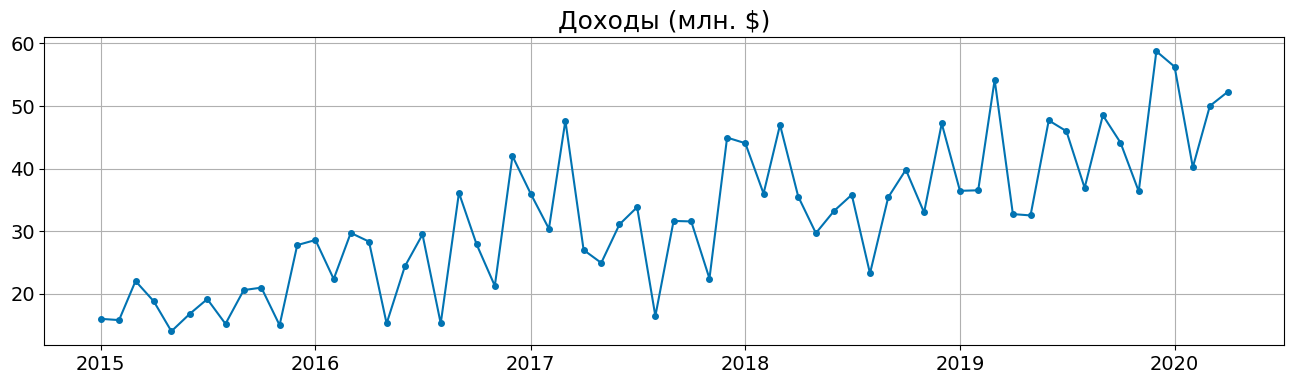

In [12]:
plt.figure(figsize=(15,6))

y = df_final.Revenue / 10**6

plot_series(y)
plt.title('Доходы (млн. $)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(which='major')
plt.ylabel('')

plt.show()

## 6. Функция проверки качества прогноза с помощью MAPE

### $$MAPE=\frac{100}{n}\sum_{i=1}^{n}\frac{\left| y_{i}-\hat{y}_{i} \right|}{y_{i}}$$

### где ${y}_{i} -$ фактические значения,

### $\hat{y}_{i}$ - прогнозируемые значения,

### $n$ - кол-во наблюдений

In [13]:
def mape(y_fact, y_forecast):
    return np.mean(np.abs((y_fact - y_forecast) / y_fact)) * 100

### 7. Разбиение данных на обучение и контроль 

48 16


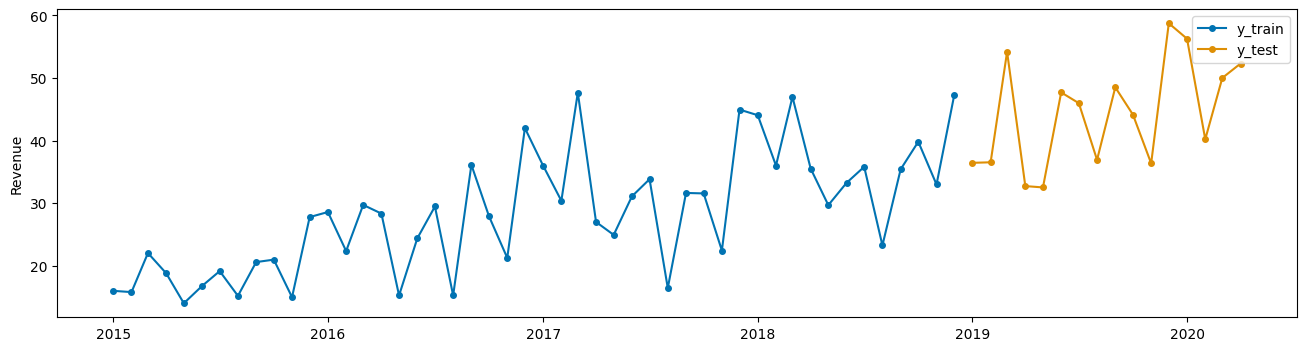

In [15]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=16)
plot_series(y_train, y_test, labels=["y_train","y_test"])
print(y_train.shape[0], y_test.shape[0])

#### Чтобы прогнозы корректно индексировались, заведём отдельную переменную с индексами-датами

In [17]:
from sktime.forecasting.base import ForecastingHorizon
ind_date = ForecastingHorizon(y_test.index, is_relative=False)
ind_date

ForecastingHorizon(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', freq=None, is_relative=False)

### 8.1 Наивный прогноз

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Revenue'>)

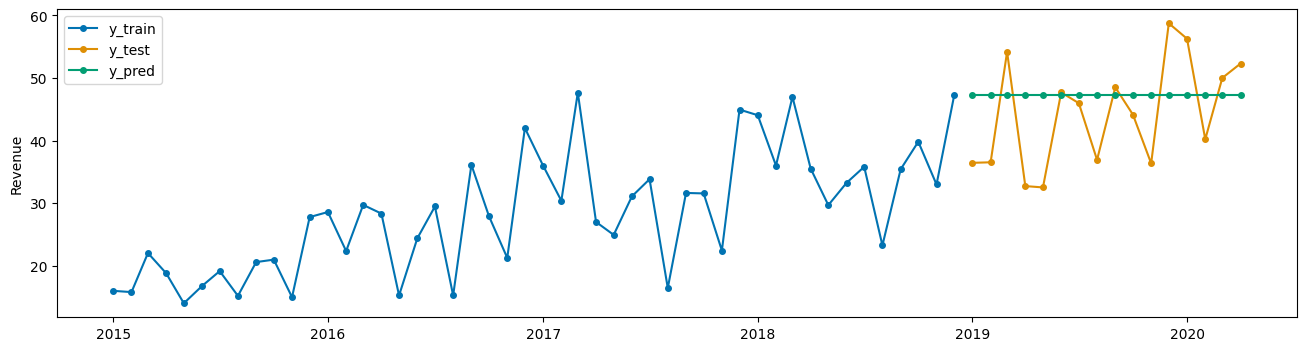

In [18]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

In [23]:
mape(y_test, y_pred)

18.98432179397833

#### Возьмём среднее за последние window_length наблюдений

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Revenue'>)

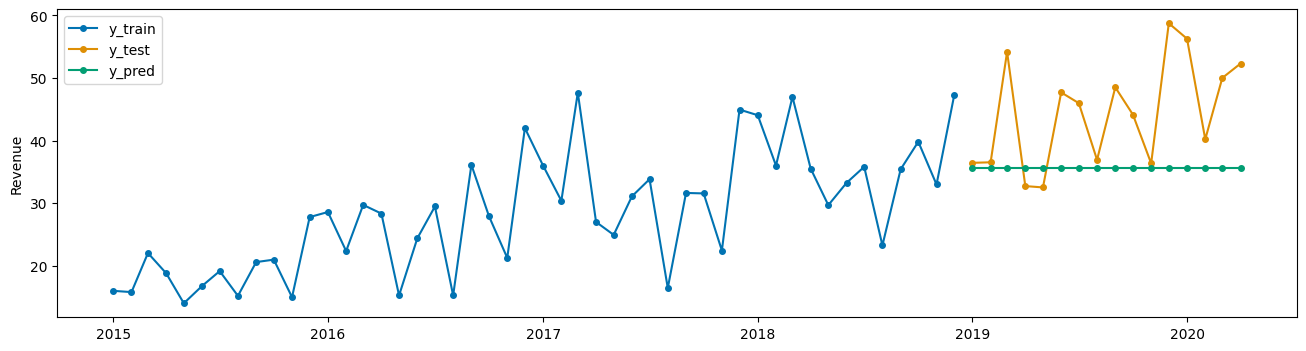

In [24]:
forecaster = NaiveForecaster(strategy="mean", window_length=16)
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

In [25]:
mape(y_test, y_pred)

18.98432179397833